# Class #3: Distributions - Examples
In this notebook we'll go over different data distributions. First we import the necessary packages.

In [13]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

## Compare Standard Deviations

In [11]:
def plot_and_describe(x, bins):
    mean = np.mean(x)
    var = np.var(x)
    std = np.std(x)
    skewness = stats.stats.skew(x)
    kurtosis = stats.stats.kurtosis(x)

    df = pd.Series([mean, var, std, skewness, kurtosis],
            index=['mean', 'variance', 'std.', 'skewness', 'kurtosis'])
    df = pd.DataFrame(df, columns=['value'])
    display(df)
    #plot
    plt.figure(figsize=(10,5))
    ax = plt.subplot(121)
    ax.plot(x)
    ax.set_xlabel("x")
    
    ax = plt.subplot(122)
    ax.hist(x, bins=bins)
    ax.set_ylabel("count")
    ax.set_xlabel("hist (x)")
    plt.tight_layout()
    plt.show()

,value
mean,4.406000
variance,8.157164
std.,2.856075
skewness,0.063254
kurtosis,-1.215581


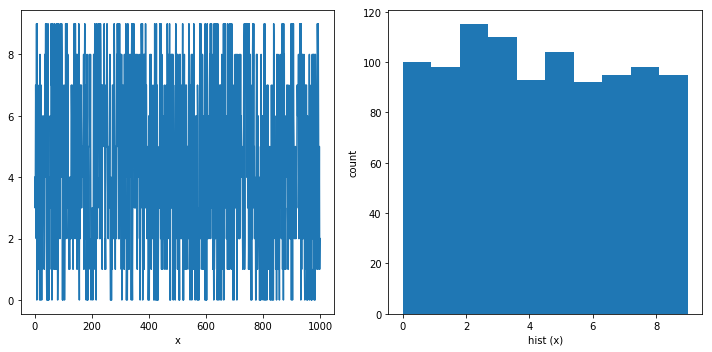

In [30]:
# random draws
x_uniform = np.random.randint(0,10,1000)
plot_and_describe(x_uniform, 10)

,value
mean,4.406000
variance,8.157164
std.,2.856075
skewness,0.063254
kurtosis,-1.215581


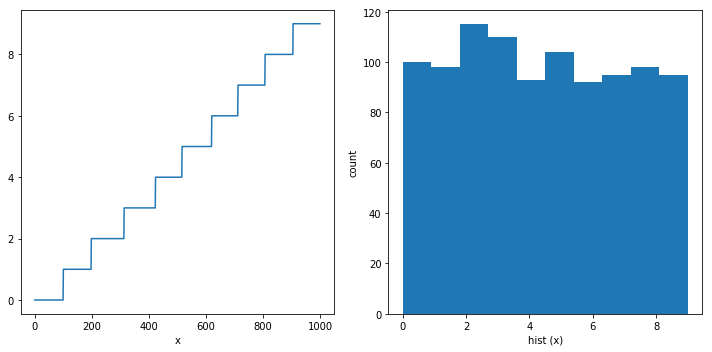

In [31]:
plot_and_describe(sorted(x_uniform), 10)

,value
mean,0.139971
variance,100.459990
std.,10.022973
skewness,-0.049234
kurtosis,0.059521


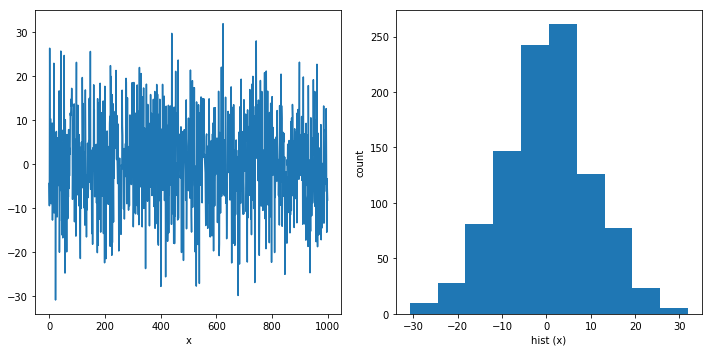

In [32]:
x_normal = stats.norm.rvs(0, 10, 1000)
plot_and_describe(x_normal, 10)

,value
mean,0.139971
variance,100.459990
std.,10.022973
skewness,-0.049234
kurtosis,0.059521


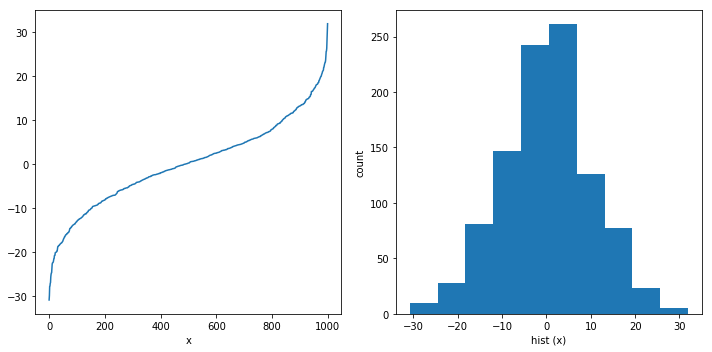

In [33]:
plot_and_describe(sorted(x_normal), 10)

### Frequency and Probability Distributions
In this case we will sample 1000 M&Ms and show the resulting frequency table, frequency distribution, and probability distribution

In [2]:
colours = ["Brown", "Yellow", "Red", "Green", "Orange", "Tan"]
probs = [0.3, 0.2, 0.2, 0.1, 0.1, 0.1]

m_and_ms = {"Brown": 0, "Yellow": 0, "Red": 0, "Green": 0, "Orange": 0, "Tan": 0}
for counter in range(1000):
    colour = np.random.choice(colours, p=probs)
    m_and_ms[colour] += 1

m_and_ms_df = pd.DataFrame.from_dict(m_and_ms, orient="index")
m_and_ms_df.columns = ["Count"]
m_and_ms_df

,Count
Brown,297
Yellow,217
Red,193
Green,115
Orange,95
Tan,83


In [3]:
plot_data = [go.Bar(
            x=m_and_ms_df.index.tolist(),
            y=m_and_ms_df["Count"],
    )]

plot_layout = go.Layout(
    title="M&M Colour Frequency Distribution",
    xaxis=dict(
        title='Colour'
    ),
    yaxis=dict(
        title='Count'
    )
)

fig = go.Figure(data=plot_data, layout=plot_layout)

iplot(fig)

In [4]:
plot_data = [go.Bar(
            x=m_and_ms_df.index.tolist(),
            y=m_and_ms_df["Count"] / m_and_ms_df["Count"].sum(),
    )]

plot_layout = go.Layout(
    title="M&M Colour Probability Distribution",
    xaxis=dict(
        title='Colour'
    ),
    yaxis=dict(
        title='Probability'
    )
)

fig = go.Figure(data=plot_data, layout=plot_layout)

iplot(fig)

### Bernoulli distribution

The probability mass, or marginal likelihood, function, is:

$$p(y|\theta) = \theta^{y} (1-\theta)^{1-y} = \begin{cases}
\theta & y = 1 \\
1 - \theta & y = 0
\end{cases}$$

<u>Example</u><br>
The kicker for the Philedelphia Eagles makes 50 yard field goals 35% of the time. We can model that using a Bernoulli distribution where y=1 when the kick is good, and y=0 when the kick is no good.

In [5]:
kick_prob = 0.35

In [6]:
num_tests = 1000
kick_values = []

for test in range(num_tests):
    kick_made = np.random.choice([1, 0], p=[kick_prob, (1-kick_prob)])
    kick_values.append(kick_made)

plot_data = [go.Histogram(x=kick_values, histnorm='probability')]

plot_layout = go.Layout(
    xaxis=dict(
        title='Kick Made'
    ),
    yaxis=dict(
        title='Probability'
    )
)

fig = go.Figure(data=plot_data, layout=plot_layout)
iplot(fig)

In [7]:
sample_proportion = sum(kick_values) / kick_values.__len__()
print("The sample proportion is %s" % sample_proportion)

The sample proportion is 0.34


### Geometric Distribution

$$p(x, p) = p (1-p)^{x}$$

What is the probability that the first kick will be successful? How about for subsequent kicks? The Geometric Distribution allows us to calculate how many trials we would have to undertake until we find a 'success'.

In [8]:
# Chance that the first kick is the first success
prob_1 = kick_prob
print(prob_1)

# Chance that the second kick is the first success
prob_2 = (1-kick_prob) * kick_prob
print(prob_2)

# Chance that the third kick is the first success
prob_3 = (1-kick_prob) * (1-kick_prob) * kick_prob
print(prob_3)

0.35
0.22749999999999998
0.147875


Let's check this with a simulation

In [9]:
num_tests = 1000
kick_values = []

for test in range(num_tests):
    num_kicks = 0
    success = 0
    while (success == 0):
        success = np.random.choice([1, 0], p=[kick_prob, (1-kick_prob)])
        num_kicks += 1
    kick_values.append(num_kicks)


    
plot_data = [go.Histogram(x=kick_values, histnorm='probability')]

plot_layout = go.Layout(
    xaxis=dict(
        title='Number of Kicks Before First Success'
    ),
    yaxis=dict(
        title='Probability'
    )
)

fig = go.Figure(data=plot_data, layout=plot_layout)
iplot(fig)

### Binomial Distribution

$$
P(n;N,p)=\displaystyle \left(
\frac{N!}{n!(N-n)!}
\right)
p^n (1-p)^{N-n}
$$

mean=$Np$, variance=$Np(1-p)$

Suppose the kicker is given five chances to make the field goal. What is the probability that exactly one kick will be a success? Two kicks?

In [10]:
# Chance that he makes one kick
# This can happen like this: 
# M - M - M - M - H

prob_1 = (1-kick_prob) * (1-kick_prob) * (1-kick_prob) * (1-kick_prob) * (kick_prob)

# but it can also happen these ways:
# H - M - M - M - M
# M - H - M - M - M
# M - M - H - M - M
# M - M - M - H - M
# M - M - M - M - H

# So:
prob_1 = prob_1 * 5
print(prob_1)

# How about for exactly two kicks:
# H - H - M - M - M
# H - M - H - M - M
# H - M - M - H - M
# H - M - M - M - H
# M - H - H - M - M
# M - H - M - H - M
# M - H - M - M - H
# M - M - H - H - M
# M - M - H - M - H
# M - M - M - H - H
prob_2 = ((kick_prob) * (kick_prob) * (1-kick_prob) * (1-kick_prob) * (1-kick_prob)) * 10
print(prob_2)

# Finally, for exactly three kicks:
# H - H - H - M - M
# H - H - M - H - M
# H - H - M - M - H
# H - M - H - H - M
# H - M - M - H - H
# H - M - M - H - H
# M - H - H - H - M
# M - H - H - M - H
# M - H - M - H - H
# M - M - H - H - H
prob_3 = ((kick_prob) * (kick_prob) * (kick_prob) * (1-kick_prob) * (1-kick_prob)) * 10
print(prob_3)

0.3123859375000001
0.336415625
0.18114687499999998


Again, we'll check with a simulation

In [11]:
num_tests = 1000
kick_values = []

for test in range(num_tests):
    # Kick 5 times
    kick_1 = np.random.choice([1, 0], p=[kick_prob, (1-kick_prob)])
    kick_2 = np.random.choice([1, 0], p=[kick_prob, (1-kick_prob)])
    kick_3 = np.random.choice([1, 0], p=[kick_prob, (1-kick_prob)])
    kick_4 = np.random.choice([1, 0], p=[kick_prob, (1-kick_prob)])
    kick_5 = np.random.choice([1, 0], p=[kick_prob, (1-kick_prob)])
    
    # How many kicks did we get?
    kicks_made = kick_1 + kick_2 + kick_3 + kick_4 + kick_5
    
    # Put the number of kicks made into our list
    kick_values.append(kicks_made)

plot_data = [go.Histogram(x=kick_values, histnorm='probability')]

plot_layout = go.Layout(
    xaxis=dict(
        title='Number of Kicks Made Out of 5'
    ),
    yaxis=dict(
        title='Probability'
    )
)

fig = go.Figure(data=plot_data, layout=plot_layout)
iplot(fig)

### Central Limit Theorem

From openintro textbook:

<u>Central Limit Theorem, informal description</u><br>
If a sample consists of at least 30 independent observations and the data are not strongly skewed, then the distribution of the sample mean is well approximated by a normal model.

There are other definitions or ways of saying the same thing:

Let  $\{X_n\}$ be a sequence of independent and identically distributed (iid) random variables of finite mean $\mu$ and standard deviation $\sigma$. 

Central Limit Theorem (CLT) says that the sum of iid random variables will always converge to a Gaussian distribution with mean $\mu$ and standard deviation $\sigma/\sqrt{n}$.

___
Notice that the theorem only asks for iid, not for normality.  The big application of this is that the sampling distribution of the means of any distribution will follow a normal distribution.

Let's see an example starting from a uniform distribution:
* Let's suppose we have a population that follows a uniform distribution
* We take samples and we take the average of each sample
* and then we analyze the distribution of the averages


To demonstrate the central limit theorem, let's use dice again. A fair dice has a uniform distribution that describes its probability. But if I role the dice 4 times, what distribution describes the mean of those rolls?

In [12]:
roll_means = []
for i in range(10000):
    rolls = np.random.choice([1, 2, 3, 4, 5, 6], size=50)
    roll_mean = rolls.mean()
    roll_means.append(roll_mean)

plot_data = [go.Histogram(x=roll_means, histnorm='probability')]

plot_layout = go.Layout(
    xaxis=dict(
        title='Mean of 10 Dice Rolls'
    ),
    yaxis=dict(
        title='Probability'
    )
)

fig = go.Figure(data=plot_data, layout=plot_layout)
iplot(fig)